In [3]:
%matplotlib inline
import pandas
import sklearn.manifold
import matplotlib.pyplot as plt
import numpy

/Users/anqin/anaconda/lib/python2.7/site-packages/pandas-0.18.1-py2.7-macosx-10.5-x86_64.egg/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [4]:
mESC_exp = pandas.read_table("simutaneous/GSE74534_RNA-seq_normalized_counts.txt",header=0,index_col=0)

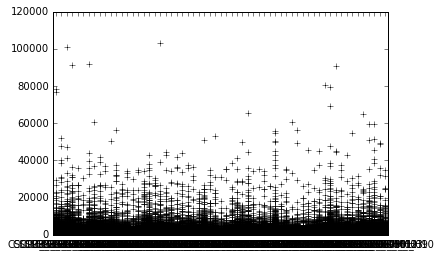

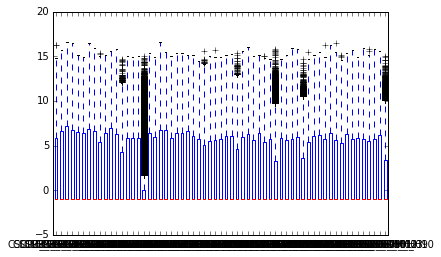

In [5]:
mESC_exp.plot.box()
plt.show()

numpy.log2(mESC_exp+0.5).plot.box()
plt.show()

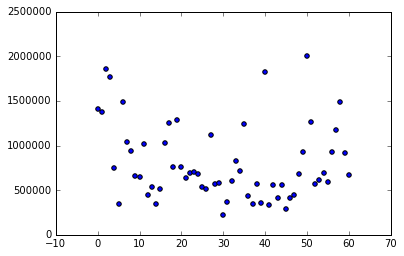

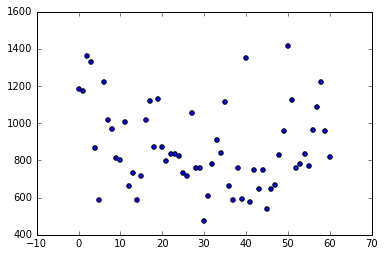

In [6]:
plt.scatter(y=numpy.var(mESC_exp),x=range(0,len(mESC_exp.columns)))
plt.show()
plt.scatter(y=numpy.std(mESC_exp),x=range(0,len(mESC_exp.columns)))
plt.show()


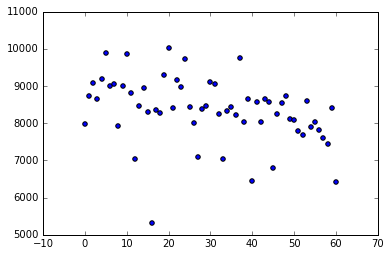

(21255, 61)


In [7]:
plt.scatter(y=(mESC_exp.T > 0).astype(int).sum(axis=1),x=range(0,len(mESC_exp.columns)))
plt.show()
print mESC_exp.shape

In [45]:
# find sample with low number of genes
sample_flag = ( (mESC_exp.T > 0).astype(int).sum(axis=1) > 7000) 
mESC_exp_SamFil = mESC_exp.iloc[:,(numpy.where(sample_flag == True)[0])]
mESC_exp_SamFil.head()
mESC_exp_SamFil.shape

(21255, 57)

In [46]:
# filter low expressed genes amnong all samples
mESC_exp_SamFil_GenFil = mESC_exp_SamFil.iloc[ numpy.where((mESC_exp_SamFil.T > 0).astype(int).sum(axis=0) > 6)[0],: ]
print mESC_exp_SamFil_GenFil.shape


(13603, 57)


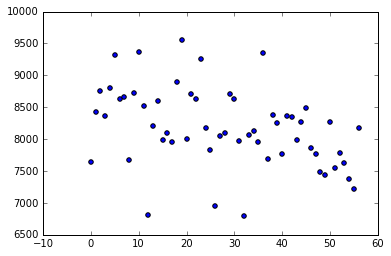

In [66]:
plt.scatter(y=(mESC_exp_SamFil_GenFil.T > 0).astype(int).sum(axis=1),x=range(0,len(mESC_exp_SamFil_GenFil.columns)))
plt.show()

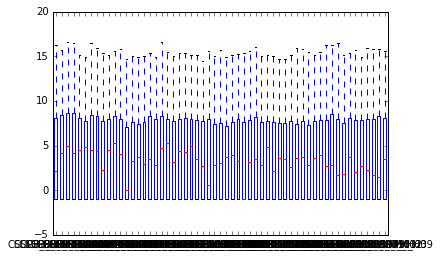

In [50]:
numpy.log2(mESC_exp_SamFil_GenFil+0.5).plot.box()

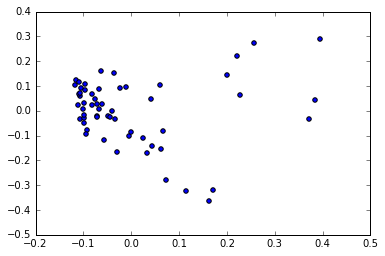

In [60]:
Embedding_v_2,Err = sklearn.manifold.locally_linear_embedding(mESC_exp_SamFil_GenFil.T,n_neighbors=9, n_components=2, method='modified')
#plt.scatter(x=Embedding_v,y=[1]*len(Embedding_v))
plt.scatter(x=Embedding_v_2[:,0],y=Embedding_v_2[:,1])
plt.show()

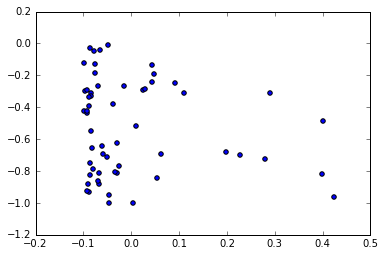

In [64]:
Embedding_v,Err = sklearn.manifold.locally_linear_embedding(mESC_exp_SamFil_GenFil.T,n_neighbors=9, n_components=1, method='modified')
plt.scatter(x=Embedding_v,y=numpy.random.uniform(-1,0,len(Embedding_v)))
#plt.scatter(x=Embedding_v_2[:,0],y=Embedding_v_2[:,1])
plt.show()

In [69]:
mESC_exp_SamFil_GenFil.head()

,CSCP3_SERUM_A02,CSCP3_SERUM_A03,CSCP3_SERUM_A04,CSCP3_SERUM_A05,CSCP3_SERUM_A06,CSCP3_SERUM_A07,CSCP3_SERUM_A09,CSCP3_SERUM_A10,CSCP3_SERUM_B01,CSCP3_SERUM_B02,...,CSCP3_SERUM_G03,CSCP3_SERUM_G05,CSCP3_SERUM_G06,CSCP3_SERUM_G07,CSCP3_SERUM_G09,CSCP3_SERUM_G10,CSCP3_SERUM_H01,CSCP3_SERUM_H02,CSCP3_SERUM_H03,CSCP3_SERUM_H09
ens_id,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000000001,2067.817146,489.331053,1931.898272,631.224035,1890.464023,1413.677958,1779.398211,1191.744330,863.376312,478.196017,...,2107.178891,1025.374062,7.043681,2816.986385,954.789766,1030.146220,1044.632271,765.390811,1895.492512,940.973621
ENSMUSG00000000028,0.000000,182.879526,9.693297,292.884710,76.670258,761.518682,1153.506956,106.284671,964.335536,32.822494,...,0.000000,0.000000,0.000000,373.535885,0.000000,0.000000,0.000000,1906.695790,0.000000,482.654221
ENSMUSG00000000037,0.000000,133.090046,2.734047,0.000000,0.000000,41.586720,0.000000,0.000000,0.000000,0.000000,...,0.000000,852.370170,0.000000,0.000000,0.000000,137.554751,0.000000,0.000000,0.000000,39.284814
ENSMUSG00000000056,0.000000,13.571329,0.000000,598.406976,182.267080,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,63.061875,0.000000,0.000000,210.124454,861.088046,379.093099,0.000000
ENSMUSG00000000058,379.454922,0.000000,114.086869,420.021599,0.000000,66.517913,37.194040,0.000000,11.420307,0.000000,...,235.066327,252.559746,0.000000,0.000000,0.000000,0.000000,14.305369,0.000000,0.000000,0.000000


In [71]:
mESC_exp_SamFil_GenFil.to_csv(path_or_buf = "mESC_exp_SamFil_GenFil.csv")
numpy.savetxt("Embedding_v.csv", Embedding_v, delimiter=",")